## Dolphins graph

- Download the .mtx graph file from https://networkrepository.com/soc-dolphins.php. 
- This file essentially is a matrix file depicting the edges of the graph.

In [ ]:
from scipy.io import mmread

dolphins = mmread('drive/MyDrive/EE5111/soc-dolphins.mtx')
dolphins = dolphins.toarray()

In [ ]:
dolphins.shape

(62, 62)

The graph has 62 nodes.

1 represents the presence of an edge, 0 represents the absence of an edge

## Transition matrix for simple random walk

In [ ]:
import numpy as np

In [ ]:
def gen_srw_transition(graph):

  vertices = graph.shape[0]
  trans_mtx = np.zeros((vertices, vertices))
  degrees = []

  for i in range(vertices):
    total_edges = np.sum(graph[i, :])
    degrees.append(total_edges)
    trans_mtx[i, :] = graph[i, :]/total_edges
  
  return trans_mtx, degrees

In [ ]:
srw_mtx, d = gen_srw_transition(dolphins)

In [ ]:
srw_mtx[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.16666667, 0.        , 0.        , 0.        , 0.16666667,
       0.16666667, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.16666667, 0.        , 0.16666667, 0.        , 0.        ,
       0.        , 0.        , 0.16666667, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [ ]:
sum(d)

318.0

## CIFAR-10

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
from tqdm import tqdm

In [ ]:
transform = transforms.Compose([
    transforms.Resize([6, 6]),
    transforms.ToTensor()
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform= transform)

Files already downloaded and verified


In [ ]:
data = []
labels = []

for i in range(50000):
  data.append(train_dataset[i][0].numpy().flatten())
  labels.append(train_dataset[i][1])

data

In [ ]:
data[0]

array([0.32156864, 0.47058824, 0.45882353, 0.4627451 , 0.50980395,
       0.46666667, 0.49803922, 0.48235294, 0.40784314, 0.4745098 ,
       0.46666667, 0.45490196, 0.53333336, 0.48235294, 0.6901961 ,
       0.78039217, 0.64705884, 0.5254902 , 0.52156866, 0.65882355,
       0.74509805, 0.7058824 , 0.7058824 , 0.5137255 , 0.5686275 ,
       0.63529414, 0.65882355, 0.5647059 , 0.5176471 , 0.54509807,
       0.6901961 , 0.60784316, 0.5647059 , 0.5568628 , 0.50980395,
       0.50980395, 0.21176471, 0.31764707, 0.31764707, 0.32156864,
       0.36078432, 0.32941177, 0.34509805, 0.3254902 , 0.25490198,
       0.2901961 , 0.3019608 , 0.30980393, 0.3882353 , 0.3372549 ,
       0.53333336, 0.6431373 , 0.5137255 , 0.3764706 , 0.3647059 ,
       0.5372549 , 0.6117647 , 0.6       , 0.6117647 , 0.40784314,
       0.3882353 , 0.47843137, 0.5019608 , 0.4       , 0.40392157,
       0.48235294, 0.5294118 , 0.4509804 , 0.39607844, 0.38039216,
       0.36078432, 0.39215687, 0.11372549, 0.18039216, 0.17647

In [ ]:
x0 = []
x1 = []




for i in range(50000):

  if ((labels[i] == 0) and len(x0) < 31 ):
    x0.append(data[i])
  if ((labels[i] == 3) and len(x1) < 31 ):
    x1.append(data[i])
  


In [ ]:
len(x0)

31

In [ ]:
n = 62
k = 108

In [ ]:
def fun(x):
  x = x.reshape(k, 1)

  sum = 0

  for i in range(n//2):
    xi = x0[i].reshape(k, 1)
    sum += np.log(1 + np.exp(-1*(xi.T @ x)))
  for i in range(n//2):
    xi = x1[i].reshape(k, 1)
    sum += np.log(1 + np.exp(1*(xi.T @ x)))
  
  sum /= n

  sum += 0.5*(x.T @ x)


  return sum

In [ ]:
from scipy.optimize import minimize

In [ ]:
test = minimize(fun, np.random.rand(k))

In [ ]:
theta_optim = test.x

### Performing SGD

In [ ]:
import matplotlib.pyplot as plt

In [ ]:


losses = []

num_expts = 50

for expt in range(num_expts):

  print("Running experiment:", expt+1)

  ep_loss = []

  theta = np.random.rand(k, 1)

  num_iter = int(1e5)

  current_node = np.random.choice(np.arange(0, n))

  for i in range(1, num_iter + 1):

    if current_node < 31:
      xi = x0[current_node].reshape(k, 1)
      yi = 1
    else:
      xi = x1[current_node - 31].reshape(k, 1)
      yi = -1

    gamma = 1/(i**(0.9))

    exp_term = np.exp(-yi*(xi.T @  theta))


    grad_g = (sum(d)/(n*d[current_node]))*( ((exp_term * (-yi) )/(1 + exp_term))*xi + 0.5*theta )

    theta -= gamma * grad_g

    current_node = np.random.choice(np.arange(0, n), p = srw_mtx[current_node].reshape(n))  

    ep_loss.append(np.linalg.norm(theta - theta_optim)**2)
  
  losses.append(ep_loss)




Running experiment: 1
Running experiment: 2
Running experiment: 3
Running experiment: 4
Running experiment: 5
Running experiment: 6
Running experiment: 7
Running experiment: 8
Running experiment: 9
Running experiment: 10
Running experiment: 11
Running experiment: 12
Running experiment: 13
Running experiment: 14
Running experiment: 15
Running experiment: 16
Running experiment: 17
Running experiment: 18
Running experiment: 19
Running experiment: 20
Running experiment: 21
Running experiment: 22
Running experiment: 23
Running experiment: 24
Running experiment: 25
Running experiment: 26
Running experiment: 27
Running experiment: 28
Running experiment: 29
Running experiment: 30
Running experiment: 31
Running experiment: 32
Running experiment: 33
Running experiment: 34
Running experiment: 35
Running experiment: 36
Running experiment: 37
Running experiment: 38
Running experiment: 39
Running experiment: 40
Running experiment: 41
Running experiment: 42
Running experiment: 43
Running experiment: 

In [ ]:
exp_loss_srw = np.mean(np.array(losses), axis = 0)

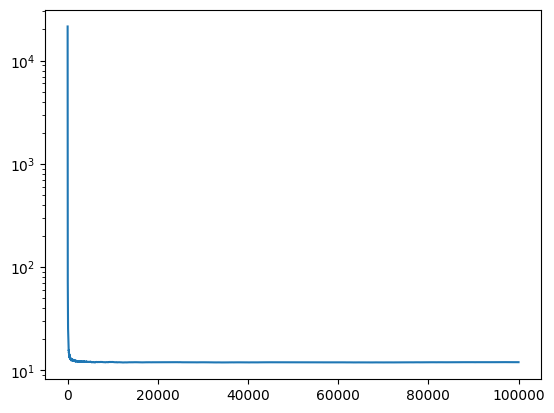

In [ ]:
plt.plot(np.arange(0, num_iter), (exp_loss_srw))
plt.yscale('log')

In [ ]:

losses_nbrw = []

num_expts = 50

for expt in range(num_expts):

  print("Running experiment:", expt+1)

  theta = np.random.rand(k, 1)

  num_iter = int(1e5)

  ep_loss = []

  current_node = np.random.choice(np.arange(0, n))

  for i in range(1, num_iter + 1):
  

    if current_node < 31:
      xi = x0[current_node].reshape(k, 1)
      yi = 1
    else:
      xi = x1[current_node - 31].reshape(k, 1)
      yi = -1

    gamma = 1/(i**(0.9))

    exp_term = np.exp(-yi*(xi.T @  theta))


    grad_g = (sum(d)/(n*d[current_node]))*( ((exp_term * (-yi) )/(1 + exp_term))*xi + 0.5*theta )

    theta -= gamma * grad_g

    if i == 1:
      previous_node = current_node
      current_node = np.random.choice(np.arange(0, n), p = srw_mtx[current_node].reshape(n))  

    else:
      probs_nbrw = dolphins[current_node].copy()
      probs_nbrw[previous_node] = 0
      if probs_nbrw.sum() == 0:
        probs_nbrw[previous_node] = 1
      else:
        probs_nbrw /= probs_nbrw.sum()
      previous_node = current_node
      current_node = np.random.choice(np.arange(0, n), p = probs_nbrw)
    
    ep_loss.append(np.linalg.norm(theta - theta_optim)**2)

  losses_nbrw.append(ep_loss)


Running experiment: 1
Running experiment: 2
Running experiment: 3
Running experiment: 4
Running experiment: 5
Running experiment: 6
Running experiment: 7
Running experiment: 8
Running experiment: 9
Running experiment: 10
Running experiment: 11
Running experiment: 12
Running experiment: 13
Running experiment: 14
Running experiment: 15
Running experiment: 16
Running experiment: 17
Running experiment: 18
Running experiment: 19
Running experiment: 20
Running experiment: 21
Running experiment: 22
Running experiment: 23
Running experiment: 24
Running experiment: 25
Running experiment: 26
Running experiment: 27
Running experiment: 28
Running experiment: 29
Running experiment: 30
Running experiment: 31
Running experiment: 32
Running experiment: 33
Running experiment: 34
Running experiment: 35
Running experiment: 36
Running experiment: 37
Running experiment: 38
Running experiment: 39
Running experiment: 40
Running experiment: 41
Running experiment: 42
Running experiment: 43
Running experiment: 

In [ ]:
exp_loss_nbrw = np.mean(np.array(losses_nbrw), axis = 0)

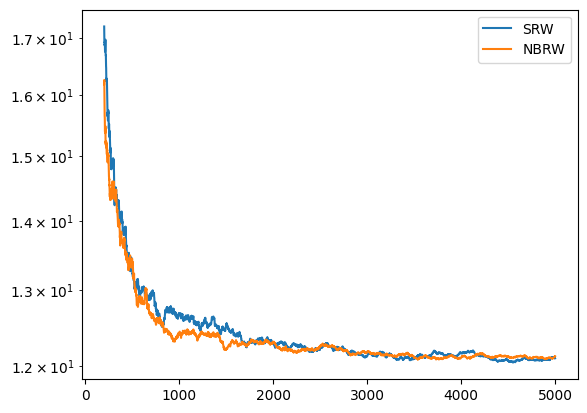

In [ ]:
plt.plot(np.arange(200, 5000), (exp_loss_srw[200:5000]), label = 'SRW')
plt.plot(np.arange(200, 5000), (exp_loss_nbrw[200:5000]), label = 'NBRW')
plt.yscale('log')
plt.legend()

#### Uniform sampling

In [ ]:

losses_us = []

num_expts = 50

for expt in range(num_expts):

  print("Running experiment:", expt+1)


  theta = np.random.rand(k, 1)

  num_iter = int(1e5)

  ep_loss = []

  for i in range(1, num_iter + 1):

    current_node = np.random.choice(np.arange(0, n))

    if current_node < 31:
      xi = x0[current_node].reshape(k, 1)
      yi = 1
    else:
      xi = x1[current_node - 31].reshape(k, 1)
      yi = -1

    gamma = 1/(i**(0.9))

    exp_term = np.exp(-yi*(xi.T @  theta))


    grad_g = ( ((exp_term * (-yi) )/(1 + exp_term))*xi + 0.5*theta )

    theta -= gamma * grad_g

    ep_loss.append(np.linalg.norm(theta - theta_optim)**2)
  
  losses_us.append(ep_loss)

Running experiment: 1
Running experiment: 2
Running experiment: 3
Running experiment: 4
Running experiment: 5
Running experiment: 6
Running experiment: 7
Running experiment: 8
Running experiment: 9
Running experiment: 10
Running experiment: 11
Running experiment: 12
Running experiment: 13
Running experiment: 14
Running experiment: 15
Running experiment: 16
Running experiment: 17
Running experiment: 18
Running experiment: 19
Running experiment: 20
Running experiment: 21
Running experiment: 22
Running experiment: 23
Running experiment: 24
Running experiment: 25
Running experiment: 26
Running experiment: 27
Running experiment: 28
Running experiment: 29
Running experiment: 30
Running experiment: 31
Running experiment: 32
Running experiment: 33
Running experiment: 34
Running experiment: 35
Running experiment: 36
Running experiment: 37
Running experiment: 38
Running experiment: 39
Running experiment: 40
Running experiment: 41
Running experiment: 42
Running experiment: 43
Running experiment: 

In [ ]:
exp_loss_us = np.mean(np.array(losses_us), axis = 0)


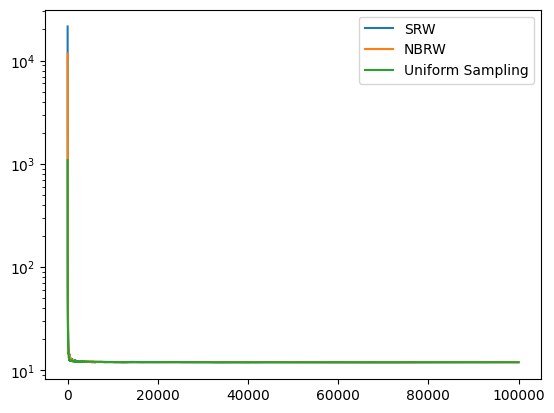

In [ ]:
plt.plot(np.arange(0, num_iter), (exp_loss_srw), label = 'SRW')
plt.plot(np.arange(0, num_iter), (exp_loss_nbrw), label = 'NBRW')
plt.plot(np.arange(0, num_iter), (exp_loss_us), label = 'Uniform Sampling')
plt.yscale('log')
plt.legend()

#### Single shuffling

In [ ]:
losses_ss = []

num_expts = 50

for expt in range(num_expts):

  print("Running experiment:", expt+1)

  node_perm = np.random.permutation(np.arange(0, n))

  theta = np.random.rand(k, 1)

  num_iter = int(1e5)

  ep_loss = []

  for i in range(1, num_iter + 1):

    current_node = node_perm[(i-1)%n]

    if current_node < 31:
      xi = x0[current_node].reshape(k, 1)
      yi = 1
    else:
      xi = x1[current_node - 31].reshape(k, 1)
      yi = -1

    gamma = 1/(i**(0.9))

    exp_term = np.exp(-yi*(xi.T @  theta))


    grad_g = ( ((exp_term * (-yi) )/(1 + exp_term))*xi + 0.5*theta )

    theta -= gamma * grad_g

    ep_loss.append(np.linalg.norm(theta - theta_optim)**2)

  losses_ss.append(ep_loss)

Running experiment: 1
Running experiment: 2
Running experiment: 3
Running experiment: 4
Running experiment: 5
Running experiment: 6
Running experiment: 7
Running experiment: 8
Running experiment: 9
Running experiment: 10
Running experiment: 11
Running experiment: 12
Running experiment: 13
Running experiment: 14
Running experiment: 15
Running experiment: 16
Running experiment: 17
Running experiment: 18
Running experiment: 19
Running experiment: 20
Running experiment: 21
Running experiment: 22
Running experiment: 23
Running experiment: 24
Running experiment: 25
Running experiment: 26
Running experiment: 27
Running experiment: 28
Running experiment: 29
Running experiment: 30
Running experiment: 31
Running experiment: 32
Running experiment: 33
Running experiment: 34
Running experiment: 35
Running experiment: 36
Running experiment: 37
Running experiment: 38
Running experiment: 39
Running experiment: 40
Running experiment: 41
Running experiment: 42
Running experiment: 43
Running experiment: 

In [ ]:
exp_loss_ss = np.mean(np.array(losses_ss), axis = 0)

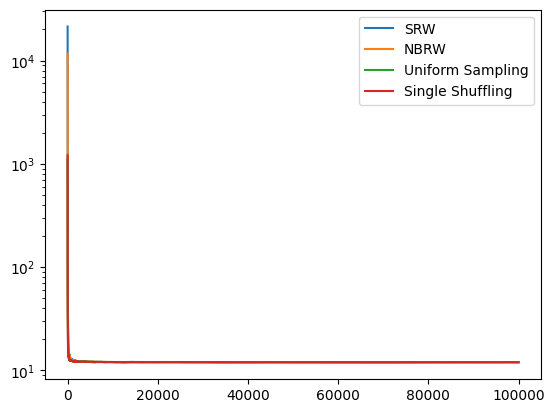

In [ ]:
plt.plot(np.arange(0, num_iter), (exp_loss_srw), label = 'SRW')
plt.plot(np.arange(0, num_iter), (exp_loss_nbrw), label = 'NBRW')
plt.plot(np.arange(0, num_iter), (exp_loss_us), label = 'Uniform Sampling')
plt.plot(np.arange(0, num_iter), (exp_loss_ss), label = 'Single Shuffling')
plt.yscale('log')
plt.legend()

#### Random shuffling

In [ ]:
losses_rs = []

num_expts = 50

for expt in range(num_expts):

  print("Running experiment:", expt+1)

  theta = np.random.rand(k, 1)

  num_iter = int(1e5)

  ep_loss = []

  for i in range(1, num_iter + 1):

    if (i-1)%n == 0:
      node_perm = np.random.permutation(np.arange(0, n))

    current_node = node_perm[(i-1)%n]

    if current_node < 31:
      xi = x0[current_node].reshape(k, 1)
      yi = 1
    else:
      xi = x1[current_node - 31].reshape(k, 1)
      yi = -1

    gamma = 1/(i**(0.9))

    exp_term = np.exp(-yi*(xi.T @  theta))


    grad_g = ( ((exp_term * (-yi) )/(1 + exp_term))*xi + 0.5*theta )

    theta -= gamma * grad_g

    ep_loss.append(np.linalg.norm(theta - theta_optim)**2)

  losses_rs.append(ep_loss)

Running experiment: 1
Running experiment: 2
Running experiment: 3
Running experiment: 4
Running experiment: 5
Running experiment: 6
Running experiment: 7
Running experiment: 8
Running experiment: 9
Running experiment: 10
Running experiment: 11
Running experiment: 12
Running experiment: 13
Running experiment: 14
Running experiment: 15
Running experiment: 16
Running experiment: 17
Running experiment: 18
Running experiment: 19
Running experiment: 20
Running experiment: 21
Running experiment: 22
Running experiment: 23
Running experiment: 24
Running experiment: 25
Running experiment: 26
Running experiment: 27
Running experiment: 28
Running experiment: 29
Running experiment: 30
Running experiment: 31
Running experiment: 32
Running experiment: 33
Running experiment: 34
Running experiment: 35
Running experiment: 36
Running experiment: 37
Running experiment: 38
Running experiment: 39
Running experiment: 40
Running experiment: 41
Running experiment: 42
Running experiment: 43
Running experiment: 

In [ ]:
exp_loss_rs = np.mean(np.array(losses_rs), axis = 0)

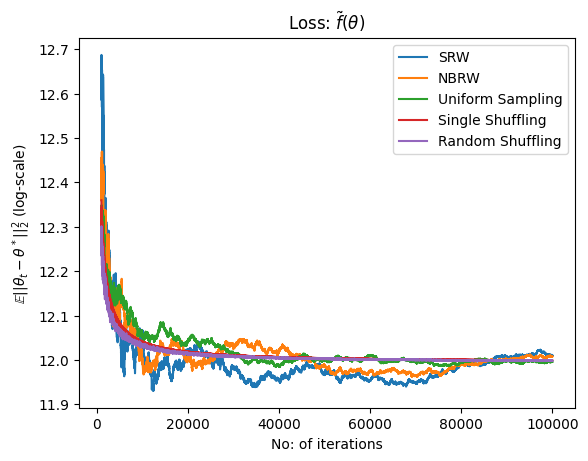

In [ ]:
plt.plot(np.arange(1001, num_iter+1), (exp_loss_srw[1000:]), label = 'SRW')
plt.plot(np.arange(1001, num_iter+1), (exp_loss_nbrw[1000:]), label = 'NBRW')
plt.plot(np.arange(1001, num_iter+1), (exp_loss_us[1000:]), label = 'Uniform Sampling')
plt.plot(np.arange(1001, num_iter+1), (exp_loss_ss[1000:]), label = 'Single Shuffling')
plt.plot(np.arange(1001, num_iter+1), (exp_loss_rs[1000:]), label = 'Random Shuffling')
#plt.yscale('log')
plt.title(r"Loss: $\tilde{f}(\theta)$")
plt.ylabel(r"$\mathbb{E}||\theta_t - \theta^*||^2_2$")
plt.xlabel("No: of iterations")
plt.legend()
plt.savefig("drive/MyDrive/EE5111/logistic_loss.eps", format='eps', bbox_inches = 'tight')

In [ ]:
gammas = [(1/(x**(0.9))) for x in range(1, num_iter+1)]

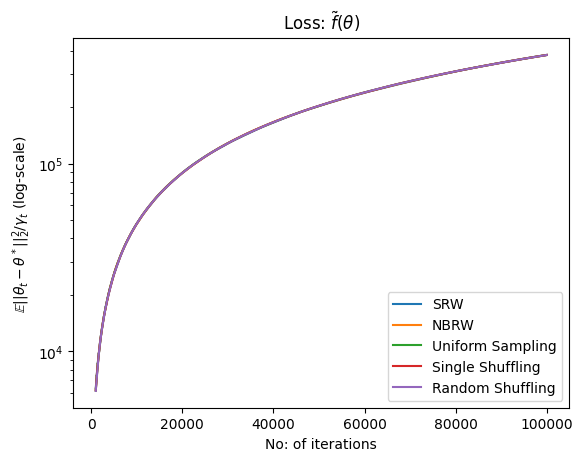

In [ ]:
plt.plot(np.arange(1001, num_iter+1), (exp_loss_srw[1000:]/gammas[1000:]), label = 'SRW')
plt.plot(np.arange(1001, num_iter+1), (exp_loss_nbrw[1000:]/gammas[1000:]), label = 'NBRW')
plt.plot(np.arange(1001, num_iter+1), (exp_loss_us[1000:]/gammas[1000:]), label = 'Uniform Sampling')
plt.plot(np.arange(1001, num_iter+1), (exp_loss_ss[1000:]/gammas[1000:]), label = 'Single Shuffling')
plt.plot(np.arange(1001, num_iter+1), (exp_loss_rs[1000:]/gammas[1000:]), label = 'Random Shuffling')
plt.yscale('log')
plt.title(r"Loss: $\tilde{f}(\theta)$")
plt.ylabel(r"$\mathbb{E}||\theta_t - \theta^*||^2_2 / \gamma_t$ (log-scale) ")
plt.xlabel("No: of iterations")
plt.legend()
plt.savefig("drive/MyDrive/EE5111/logistic_loss_gamma.eps", format='eps', bbox_inches = 'tight')